# What is Stock Analysis

Stock analysis refers to the method that an investor or trader uses to evaluate and investigate a particular trading instrument, investment sector, or the stock market as a whole. Stock analysis is also called equity analysis or market analysis. Investors or traders make buying or selling decisions based on stock analysis information.

Stock analysis helps traders to gain an insight into the economy, stock market, or securities. It involves studying the past and present market data and creating a methodology to choose appropriate stocks for trading. Stock analysis also includes the identification of ways of entry into and exit from the investments.

In [2]:
import pandas as pd
import datetime as datetime
import pandas_datareader as web
import matplotlib.pyplot as plt
import yfinance  as yf

In [3]:
start = datetime.datetime(2019,1,1)
end = datetime.datetime(2021,6,18)

In [4]:
goog = yf.download('GOOG', start=start, end=end)

amzn = yf.download('AMZN', start=start, end=end)

tsla = yf.download('TSLA', start=start, end=end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
goog.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,1050.959961,1052.699951,1023.590027,1035.609985,1035.609985,1493300
2019-01-02,1016.570007,1052.319946,1015.710022,1045.849976,1045.849976,1532600
2019-01-03,1041.000000,1056.979980,1014.070007,1016.059998,1016.059998,1841100
2019-01-04,1032.589966,1070.839966,1027.417969,1070.709961,1070.709961,2093900
2019-01-07,1071.500000,1074.000000,1054.760010,1068.390015,1068.390015,1981900


# Visualizing the data

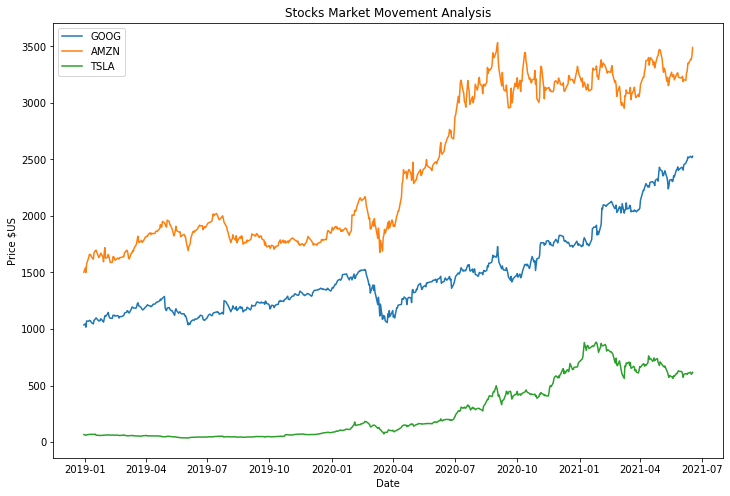

In [6]:
plt.figure(figsize=(12,8))
plt.plot(goog["Adj Close"], label='GOOG')
plt.plot(amzn["Adj Close"], label='AMZN')
plt.plot(tsla["Adj Close"], label='TSLA')
plt.title('Stocks Market Movement Analysis')
plt.ylabel('Price $US')
plt.xlabel('Date')
plt.legend();

# Stock Returns

AxesSubplot(0.125,0.2;0.775x0.68)
AxesSubplot(0.125,0.2;0.775x0.68)
AxesSubplot(0.125,0.2;0.775x0.68)


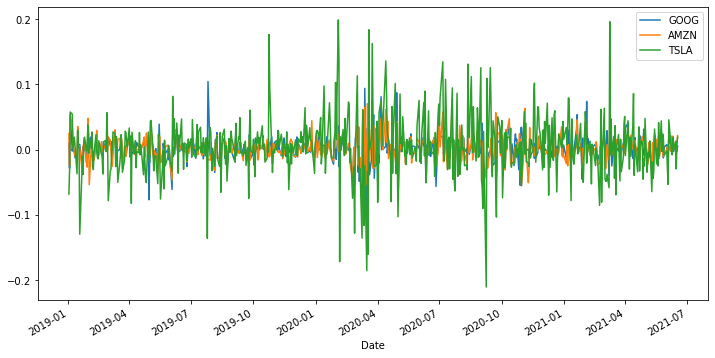

In [7]:
goog['return']=goog['Adj Close'].pct_change(1)
amzn['return']=amzn['Adj Close'].pct_change(1)
tsla['return']=tsla['Adj Close'].pct_change(1)
plt.figure(figsize=(12,6))
print(goog['return'].plot(label='GOOG'))
print(amzn['return'].plot(label='AMZN'))
print(tsla['return'].plot(label='TSLA'))
plt.legend();

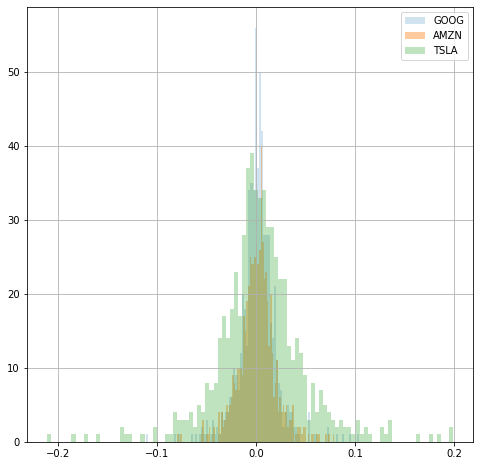

In [8]:
goog['return'].hist(bins=100, figsize=(8,8),label='GOOG', alpha=0.2)
amzn['return'].hist(bins=100,label='AMZN', alpha=0.4)
tsla['return'].hist(bins=100,label='TSLA', alpha=0.3)
plt.legend()

# Total  Value of traded stocks

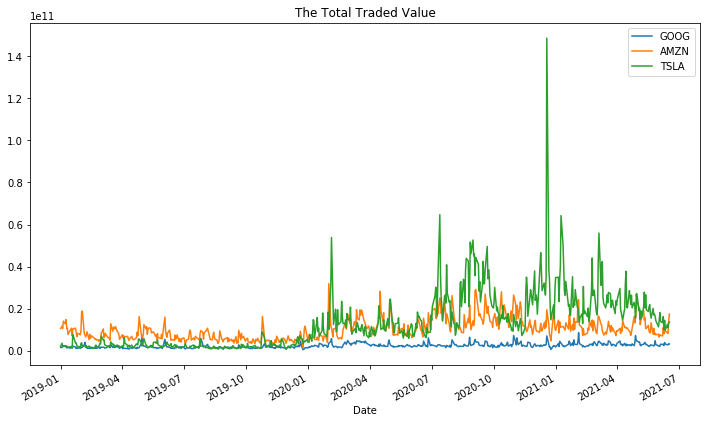

In [9]:
goog['Total traded'] = goog['Open'] * goog['Volume']
amzn['Total traded'] = amzn['Open'] * amzn['Volume']
tsla['Total traded'] = tsla['Open'] * tsla['Volume']


#plotting the total traded stock
goog['Total traded'].plot(label='GOOG', figsize=(12,7))
amzn['Total traded'].plot(label='AMZN')
tsla['Total traded'].plot(label='TSLA')
plt.title('The Total Traded Value')
plt.legend();


In [10]:
company_stock = pd.concat([goog['Open'], amzn['Open'],tsla['Open']], axis='columns')
company_stock.columns= ['GOOG Open','AMZN Open','TSLA Open']
company_stock.head()

,GOOG Open,AMZN Open,TSLA Open
Date,,,
2018-12-31,1050.959961,1510.800049,67.557999
2019-01-02,1016.570007,1465.199951,61.220001
2019-01-03,1041.000000,1520.010010,61.400002
2019-01-04,1032.589966,1530.000000,61.200001
2019-01-07,1071.500000,1602.310059,64.344002


No handles with labels found to put in legend.


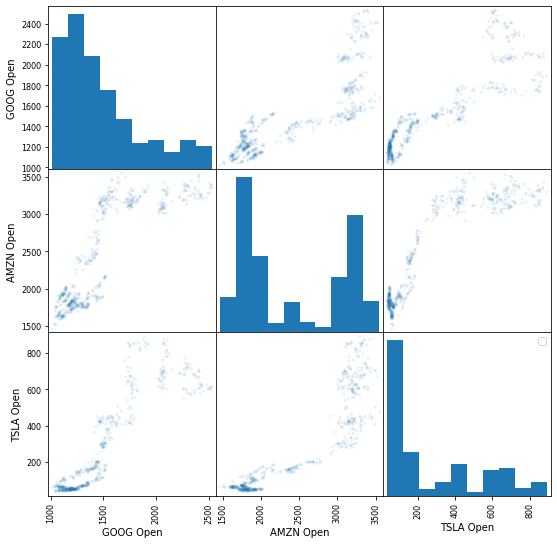

In [11]:
from pandas.plotting import scatter_matrix
scatter_matrix(company_stock, figsize=(9,9), alpha=0.1)
plt.legend()

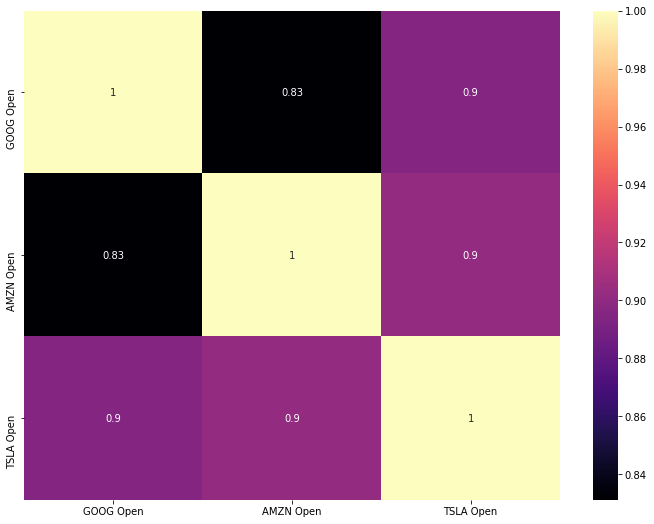

In [12]:
import seaborn as sns
plt.figure(figsize=(12,9))
sns.heatmap(company_stock.corr(), annot=True, cmap='magma')

# Simple moving Average indicator

(<matplotlib.legend.Legend at 0xb8b8788e48>,)

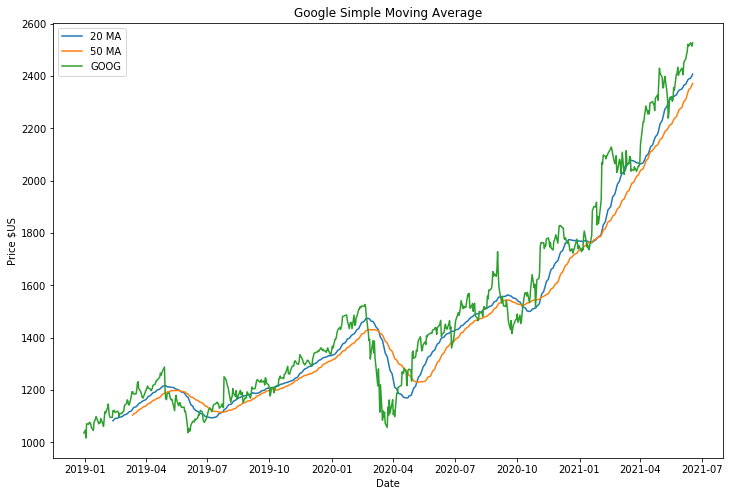

In [13]:
goog['20 MA'] = goog['Adj Close'].rolling(window=30).mean()
goog['50 MA'] = goog['Adj Close'].rolling(window=50).mean()
plt.figure(figsize=(12,8))
plt.plot(goog.index , goog['20 MA'], label='20 MA')
plt.plot(goog.index , goog['50 MA'], label='50 MA')
plt.plot(goog.index , goog['Adj Close'], label='GOOG')
plt.title('Google Simple Moving Average')
plt.ylabel('Price $US')
plt.xlabel('Date')
plt.legend(),

(<matplotlib.legend.Legend at 0xb8b898afc8>,)

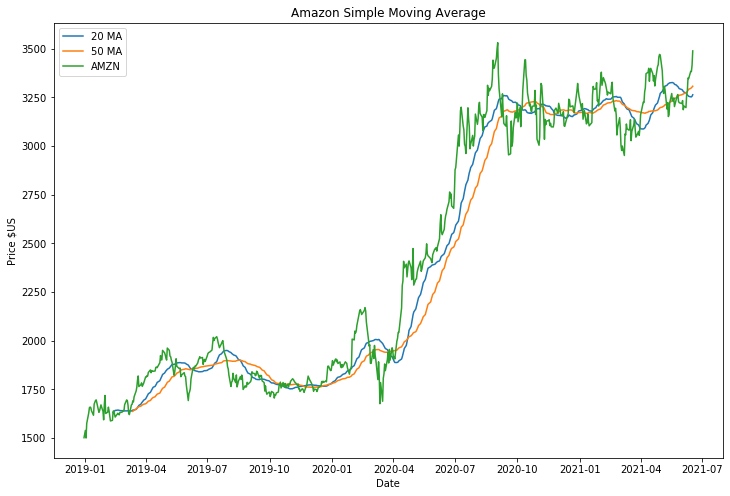

In [14]:
amzn['20 MA'] = amzn['Adj Close'].rolling(window=30).mean()
amzn['50 MA'] = amzn['Adj Close'].rolling(window=50).mean()
plt.figure(figsize=(12,8))
plt.plot(amzn.index , amzn['20 MA'], label='20 MA')
plt.plot(amzn.index , amzn['50 MA'], label='50 MA')
plt.plot(amzn.index , amzn['Adj Close'], label='AMZN')
plt.title('Amazon Simple Moving Average')
plt.ylabel('Price $US')
plt.xlabel('Date')
plt.legend(),

(<matplotlib.legend.Legend at 0xb8b8f04588>,)

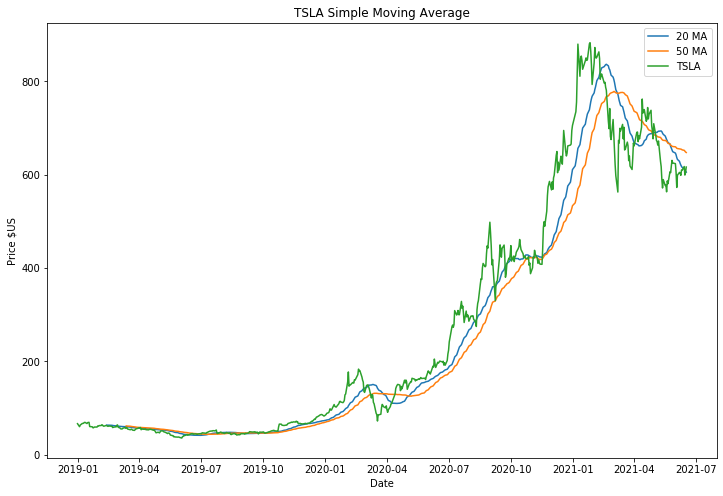

In [15]:
tsla['20 MA'] = tsla['Adj Close'].rolling(window=30).mean()
tsla['50 MA'] = tsla['Adj Close'].rolling(window=50).mean()
plt.figure(figsize=(12,8))
plt.plot(tsla.index , tsla['20 MA'], label='20 MA')
plt.plot(tsla.index , tsla['50 MA'], label='50 MA')
plt.plot(tsla.index , tsla['Adj Close'], label='TSLA')
plt.title('TSLA Simple Moving Average')
plt.ylabel('Price $US')
plt.xlabel('Date')
plt.legend(),

# Calculating Cumulative Return

In [16]:
goog['cumulative return'] = (1 + goog['return']).cumprod()
amzn['cumulative return'] = (1 + amzn['return']).cumprod()
tsla['cumulative return'] = (1 + tsla['return']).cumprod()

In [17]:
amzn

,Open,High,Low,Close,Adj Close,Volume,return,Total traded,20 MA,50 MA,cumulative return
Date,,,,,,,,,,,
2018-12-31,1510.800049,1520.760010,1487.000000,1501.969971,1501.969971,6954500,NaN,1.050686e+10,NaN,NaN,NaN
2019-01-02,1465.199951,1553.359985,1460.930054,1539.130005,1539.130005,7983100,0.024741,1.169684e+10,NaN,NaN,1.024741
2019-01-03,1520.010010,1538.000000,1497.109985,1500.280029,1500.280029,6975600,-0.025242,1.060298e+10,NaN,NaN,0.998875
2019-01-04,1530.000000,1594.000000,1518.310059,1575.390015,1575.390015,9182600,0.050064,1.404938e+10,NaN,NaN,1.048882
2019-01-07,1602.310059,1634.560059,1589.189941,1629.510010,1629.510010,7993200,0.034353,1.280758e+10,NaN,NaN,1.084915
...,...,...,...,...,...,...,...,...,...,...,...
2021-06-11,3349.649902,3366.580078,3333.449951,3346.830078,3346.830078,2813900,-0.000842,9.425580e+09,3255.941333,3292.129595,2.228294
2021-06-14,3346.830078,3385.000000,3335.500000,3383.870117,3383.870117,2569700,0.011067,8.600349e+09,3253.156340,3296.586997,2.252955
2021-06-15,3384.000000,3396.989990,3363.110107,3383.129883,3383.129883,2426200,-0.000219,8.210261e+09,3253.044336,3299.714995,2.252462


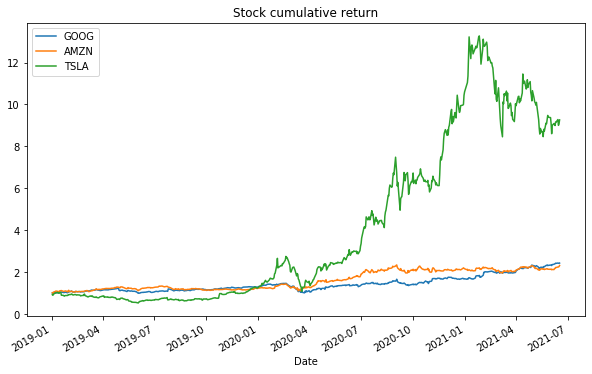

In [23]:
goog['cumulative return'].plot(label='GOOG', figsize=(10,6))
amzn['cumulative return'].plot(label='AMZN', figsize=(10,6))
tsla['cumulative return'].plot(label='TSLA', figsize=(10,6))
plt.title('Stock cumulative return')
plt.legend()

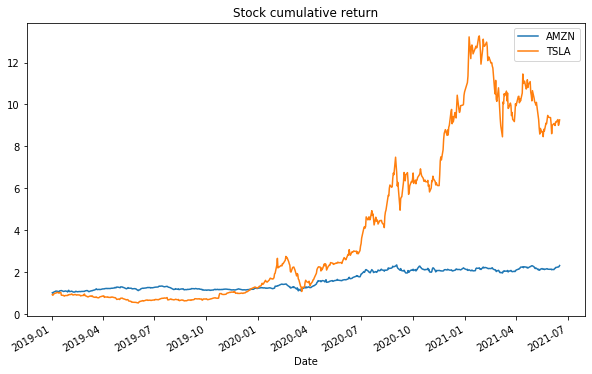

In [21]:
amzn['cumulative return'].plot(label='AMZN', figsize=(10,6))
tsla['cumulative return'].plot(label='TSLA', figsize=(10,6))
plt.title('Stock cumulative return')
plt.legend()